In [29]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [30]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.2

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [31]:
year = '2017'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = processor.dict_accumulator()

In [32]:
# Read the histogram from the pickle file
fatjetkin = pickle.load(open(year+'/fatjetkin.pkl','rb')).integrate('region','muoncontrol')
smalljetkin = pickle.load(open(year+'/smalljetkin.pkl','rb')).integrate('region','muoncontrol')
smalljetflav = pickle.load(open(year+'/smalljetflav.pkl','rb')).integrate('region','muoncontrol')
muonkin = pickle.load(open(year+'/muonkin.pkl','rb')).integrate('region','muoncontrol')

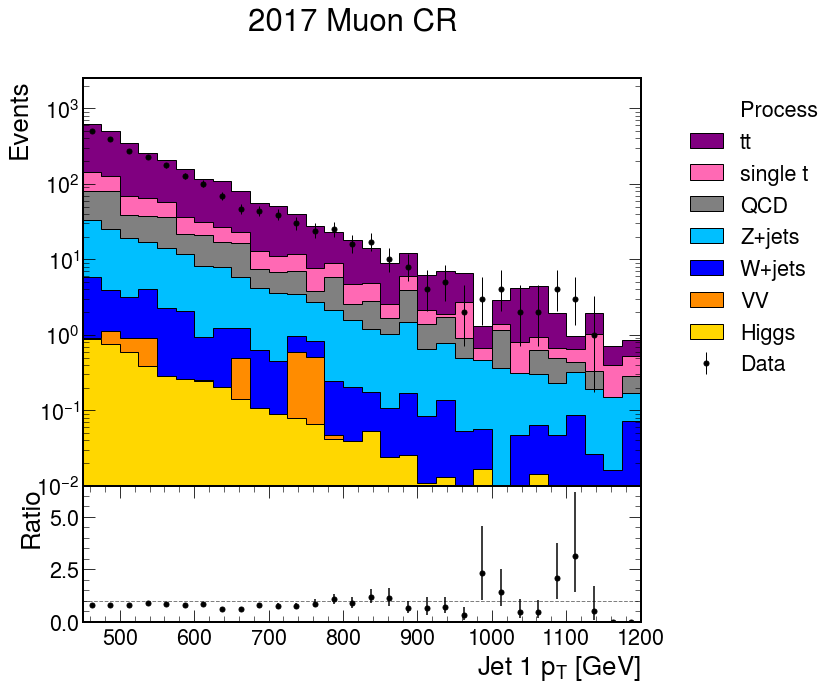

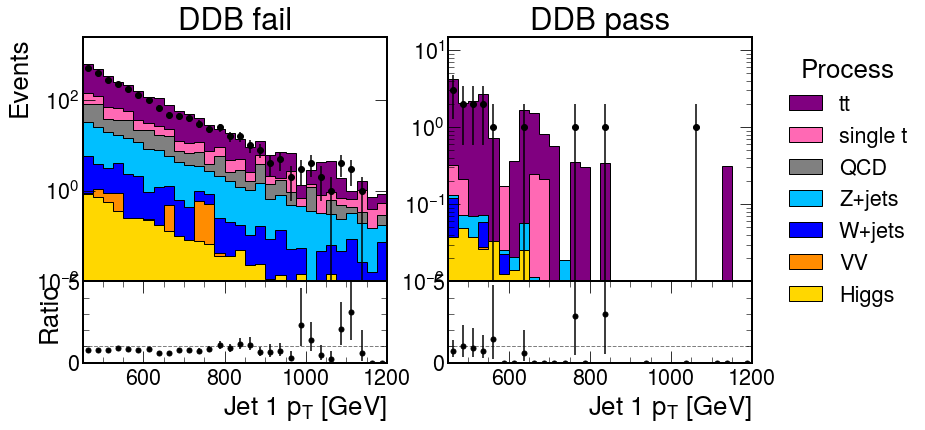

In [33]:
plot_datamc_muoncr(fatjetkin.sum('eta1','ddb1'), year+'/datamc_mucr_pt1', 'Jet 1 $p_T$ [GeV]', year+' Muon CR')
plot_datamc_muoncr_pf(fatjetkin.sum('eta1'), year+'/datamc_mucr_pt1', 'Jet 1 $p_T$ [GeV]')

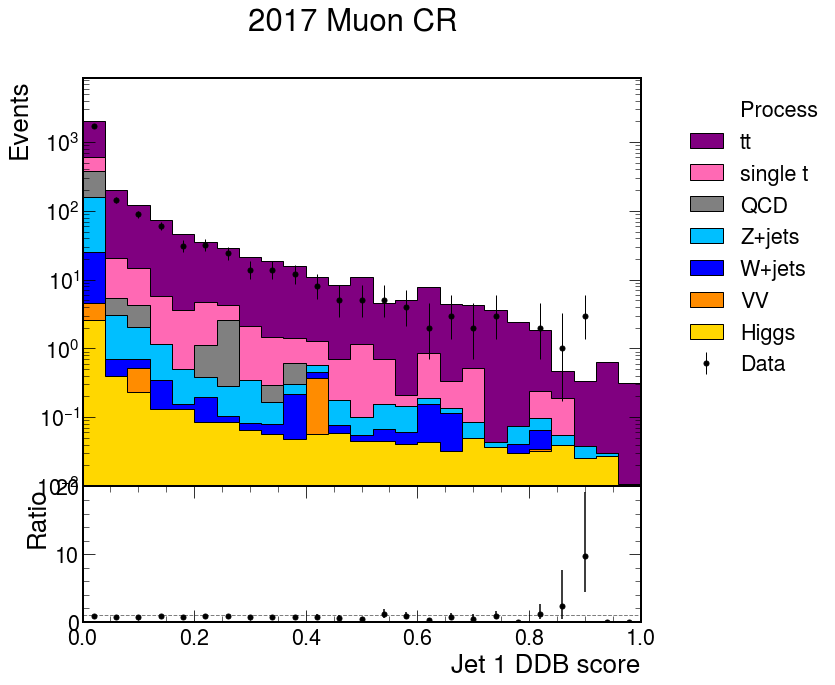

In [34]:
plot_datamc_muoncr(fatjetkin.sum('eta1','pt1'), year+'/datamc_mucr_ddb1', 'Jet 1 DDB score', year+' Muon CR')

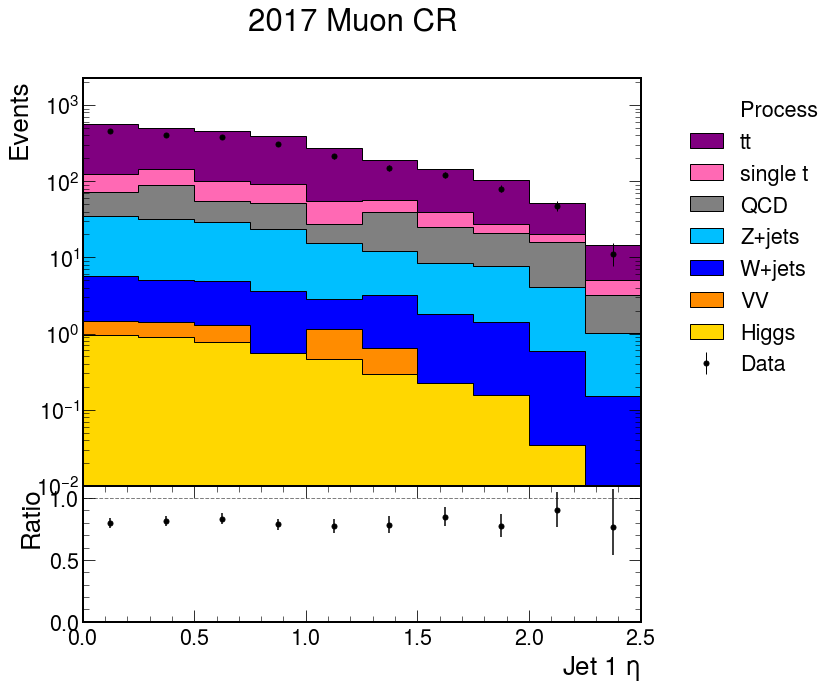

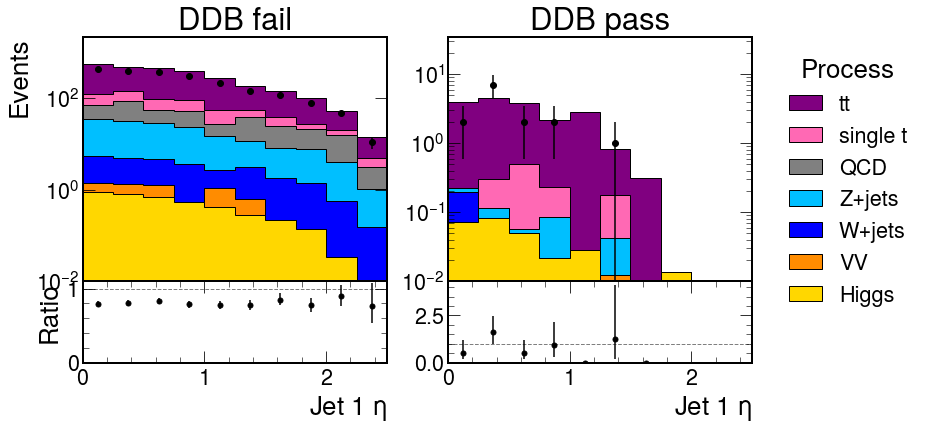

In [35]:
plot_datamc_muoncr(fatjetkin.sum('pt1','ddb1'), year+'/datamc_mucr_eta1', 'Jet 1 $\eta$', year+' Muon CR', xlim=2.5)
plot_datamc_muoncr_pf(fatjetkin.sum('pt1'), year+'/datamc_mucr_eta1', 'Jet 1 $\eta$',xlim=2.5)

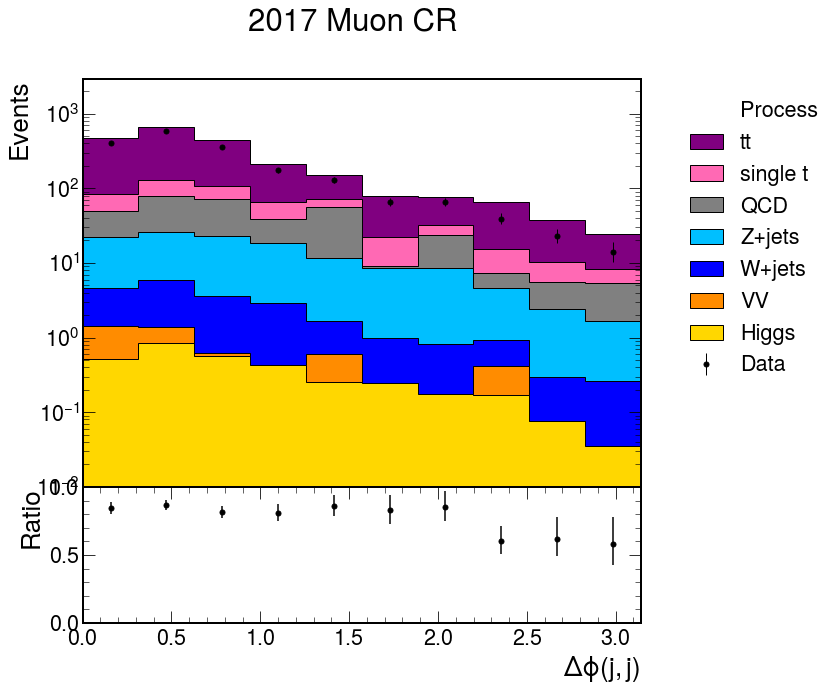

In [36]:
plot_datamc_muoncr(smalljetkin.sum('deta','mjj','ddb1'), year+'/datamc_mucr_dphi', '$\Delta \phi (j,j)$', year+' Muon CR', xlim=3.14)

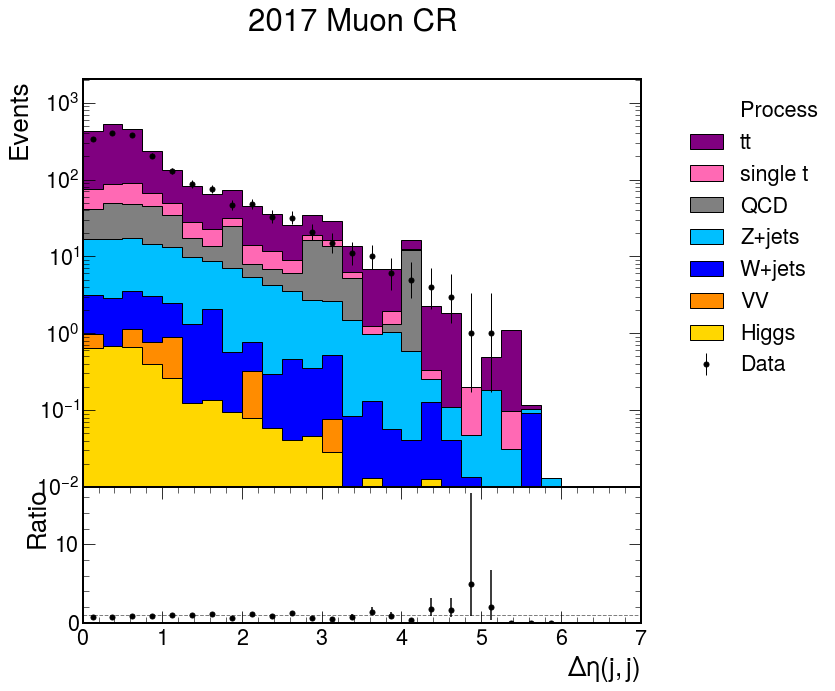

In [37]:
plot_datamc_muoncr(smalljetkin.sum('mjj','dphi','ddb1'), year+'/datamc_mucr_deta', '$\Delta \eta (j,j)$', year+' Muon CR', xlim=0)

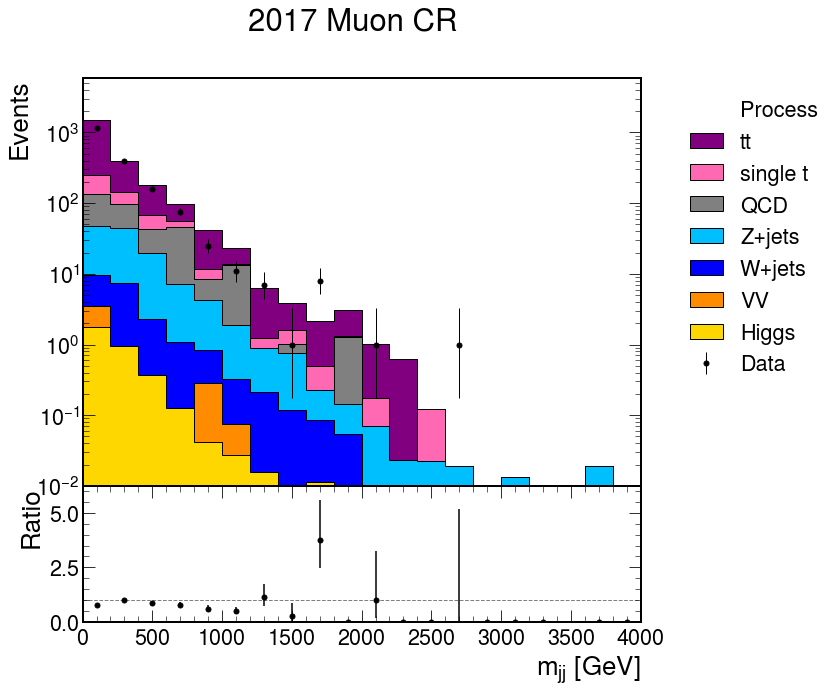

In [38]:
plot_datamc_muoncr(smalljetkin.sum('deta','dphi','ddb1'), year+'/datamc_mucr_mjj', '$m_{jj}$ [GeV]', year+' Muon CR', xlim=4000)

In [39]:
muonkin

<Hist (process,ptmu,etamu,ddb1) instance at 0x7fcaf33199d0>

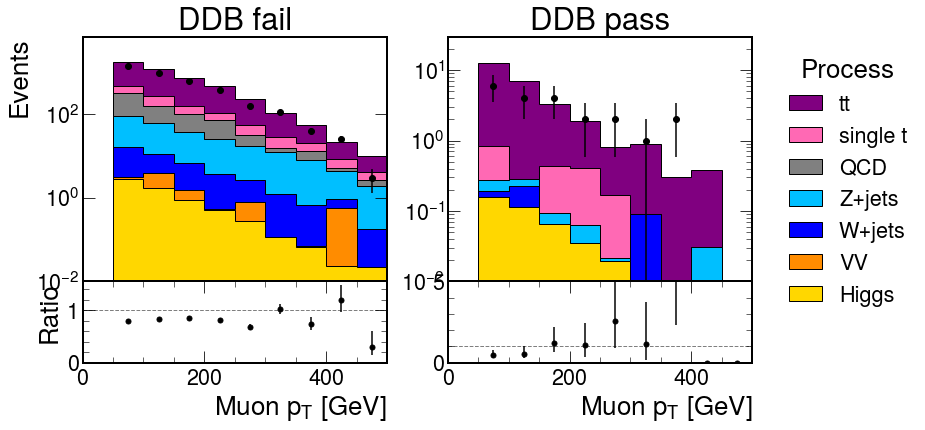

In [40]:
plot_datamc_muoncr_pf(muonkin.sum('etamu').rebin('ptmu', hist.Bin('ptmu', "rebinned ptmu", 10,0,500)), year+'/datamc_mucr_ptmu', 'Muon $p_T$ [GeV]')

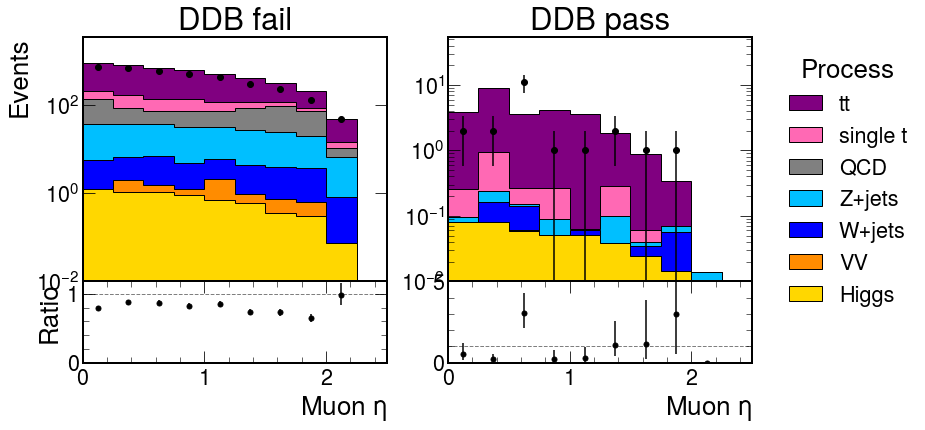

In [41]:
plot_datamc_muoncr_pf(muonkin.sum('ptmu'), year+'/datamc_mucr_etamu', 'Muon $\eta$',xlim=2.5)